# Computer Exercise \#07 - Neural Networks
### Name: Alexandyr Card
### G-Number: G01275535

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_circles

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

### Create functions for plotting contours and a 3-d plot of the classifier

In [2]:
# Plot the decision function for a classifier clf
#
def plot_classifier(clf,X,y, title, save_name):
    fig, ax = plt.subplots(figsize=(5,5))
    # ax.set_aspect('equal', adjustable='box')
    data = pd.DataFrame(X,columns=["x1","x2"])
    sns.scatterplot(data=data, x="x1", y="x2",  hue=y, palette=['red','blue'])
# create grid to evaluate model
    xx = np.linspace(-2, 2, 100)
    yy = np.linspace(-2, 2, 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.predict_proba(xy)
    Z = Z[:,1].reshape(XX.shape)#.reshape(XX.shape)
# plot decision boundary and margins
    levels = np.arange(0, 0.1, 0.1)
    plt.contour(XX, YY, Z, colors='blue', levels=[0.5], alpha=0.5,linestyles=['--', '-', '--'])
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"{save_name}.jpg")
    plt.show()

In [3]:
# Make a 3-d plot of the decision surface for classifier clf
#  Range of values for x and y are [-2, 2]
def plot_classifier_3d(clf):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))
    xx = np.linspace(-2, 2, 100)
    yy = np.linspace(-2, 2, 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.predict_proba(xy)
    Z = Z[:,1].reshape(XX.shape)#.reshape(XX.shape)
    surf = ax.plot_surface(XX,YY,Z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
    ax.set_zlim(0, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')
# Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.tight_layout()
    plt.show()

## XOR

Create the XOR data set, random values in the four quadrants.

In [4]:
np.random.seed(42) # set random seed to have reproducible results
X = np.random.uniform(low=-2, high=2, size=(200,2))
y=(X[:,1]*X[:,0] < 0).astype(int)

Make a scatter plot of the data.

In [5]:
print(X[:10,]) # (200,2) array x1, x2 rows if x1*x2 < 0 -> 0
print(y[:10])
print(X[y == 0][:10, 0])

[[-0.50183952  1.80285723]
 [ 0.92797577  0.39463394]
 [-1.37592544 -1.37602192]
 [-1.76766555  1.46470458]
 [ 0.40446005  0.83229031]
 [-1.91766202  1.87963941]
 [ 1.32977056 -1.15064356]
 [-1.27270013 -1.26638196]
 [-0.78303103  0.09902573]
 [-0.27221993 -0.83508344]]
[1 0 0 1 0 1 1 0 1 0]
[ 0.92797577 -1.37592544  0.40446005 -1.27270013 -0.27221993 -0.83142141
  1.86252813 -0.78154492 -1.51184706  1.87833851]


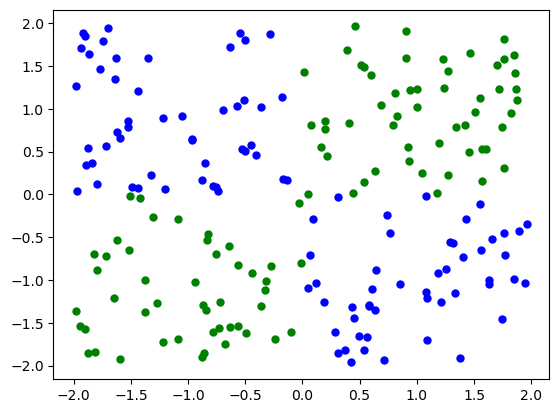

In [6]:
fig, ax = plt.subplots()
colors = ('green', 'blue')
for n_class in range(2):
    ax.scatter(X[y == n_class][:, 0], 
               X[y == n_class][:, 1], 
               c=colors[n_class], 
               s=25, 
               label=str(n_class))

hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,) The ith element represents the number of neurons in the ith hidden layer.

activation: activation function for the hidden layer. Can be identity,logistic, tanh, relu. Default it relu

solver: Used for weight optimization. Default is adam which is a SGD based algo which works well on large datasets, but smaller datasets 'lbfgs' converges faster with better performance

alpha: strength of L2 regularization


### Questions p.2
1. Default activation for hidden layers: ReLu
2. Activation function used in output layers: Logistic

In [7]:
test = MLPClassifier(hidden_layer_sizes=(5,), solver='sgd', max_iter = 5000, tol=10**(-10), random_state=7, learning_rate_init= 0.01)
test.fit(X, y)
test.out_activation_

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


'logistic'

In [8]:
### Create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

# Experiments p.3
## Design an MLP 

In [9]:
# set max_iter to 5000 to allow MLP to run longer, lowered tol for same reason
# Although lbfgs converges faster with better performance on smaller datasets I used SGD solver to receive a loss curve

# Using lbfgs we get convergence with near zero training error. This is not the case for the SGD solver

def sgd_model(neurons, struct, struct_save):
    best_sgd_model = None
    best_loss = float('inf')
    
    for i in range(4):
        clf_5 = MLPClassifier(hidden_layer_sizes=neurons, solver='sgd', max_iter = 5000, tol=10**(-10), random_state=i+7, learning_rate_init= 0.01)
        clf_5.fit(X_train, y_train)
        temp_loss = clf_5.loss_
        plt.plot(clf_5.loss_curve_, label = f"Model run:{i+1}, Loss: {round(temp_loss,3)}")
        if temp_loss < best_loss:
            best_loss = temp_loss
            best_sgd_model = clf_5
    
    plt.title(f"SGD Solver: {struct}")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"mlp_hidden_{struct_save}_loss.jpg")
    plt.show()
    
    plot_classifier(best_sgd_model, X, y, f"Best SGD Model with {struct}", f"sgd_{struct_save}")

In [13]:
# clf_test = MLPClassifier(hidden_layer_sizes=(5,), solver='lbfgs', tol=10**(-10))

def lbfgs_model(neurons, struct, struct_save):
    best_lbfgs_model = None
    best_loss_lbfgs = float('inf')
    
    for i in range(5):
        clf_lbfgs = MLPClassifier(hidden_layer_sizes=neurons, solver='lbfgs', tol=10**(-10), random_state=i+7)
        clf_lbfgs.fit(X_train,y_train)
        temp_loss = clf_lbfgs.loss_
        print(f"model pass {i+1} loss: {round(temp_loss,3)}")
        print(f"number of iterations until convergence: {clf_lbfgs.n_iter_}")
    
        if temp_loss < best_loss_lbfgs:
            best_loss_lbfgs = temp_loss
            best_lbfgs_model = clf_lbfgs
            
    plot_classifier(best_lbfgs_model, X, y, f"Best LBFGS Model with {struct}", f"lbfgs_{struct_save}")
    print(best_lbfgs_model.coefs_)

### Experiments p.2
1. As shown below, the model has varying losses due to the SGD solver. With a tolerance of 10**(-10) the model never converges and stops at the max iteration value of 5000. The best model had a loss of 0.112. Using the lbfgs solver, the model converges on all 5 runs in 170 iterations or less with a couple runs having loss of 0 when rounding to 3 digits. This is unsurprising because the documentation notes that the lbfgs solver performs better with faster convergence on small datasets.
2. Using 4 neurons, the model never converges and the best loss is 0.117. Using the LBFGS solver 4 of 5 models converged and we achieved a zero loss in the best case. We cannot use less than 4 neurons because we need 4 lines to ensure the nonlinearity maps the quadrants correctly.
3. Designing a deeper network generally provides much better peformance. Using the SGD solver because it had worse performance for each attempt I increased the depth to 2 hidden layers with 4 neurons each. Notwithstanding the poor run on iteration 2, possible due to the random nature of stochastic gradient descent, the training loss is below 10 percent.
4. Utilizing the same SGD solver with a 2 hidden layer, 4 neuron architecture I tested identity, logistic, and tanh activation functions. In all cases these performed worse than ReLu. Hyperbolic tangent had the best loss at 0.14.

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization

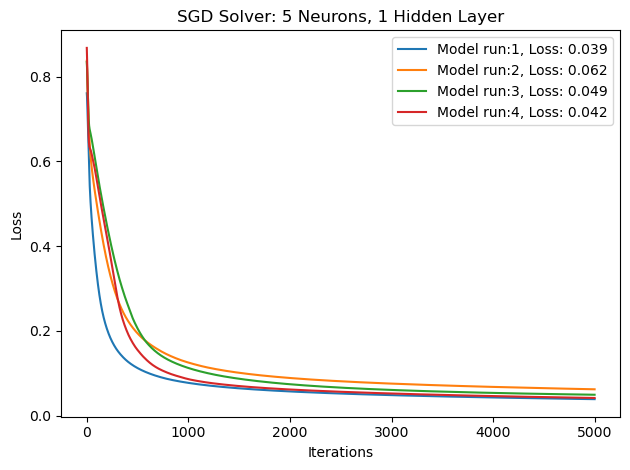

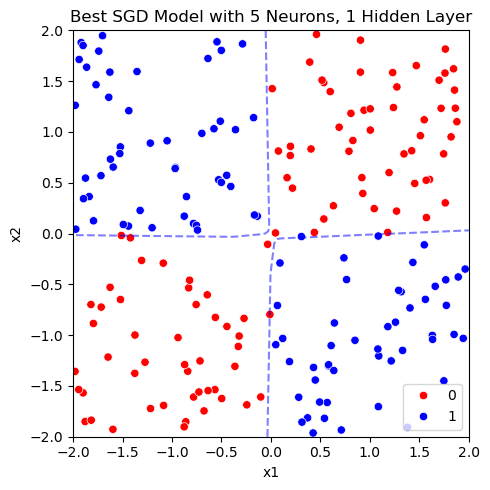

In [21]:
sgd_model((5,), "5 Neurons, 1 Hidden Layer", "5_n_1_l")

model pass 1 loss: 0.0
number of iterations until convergence: 143
model pass 2 loss: 0.001
number of iterations until convergence: 170
model pass 3 loss: 0.017
number of iterations until convergence: 100
model pass 4 loss: 0.0
number of iterations until convergence: 153
model pass 5 loss: 0.019
number of iterations until convergence: 54


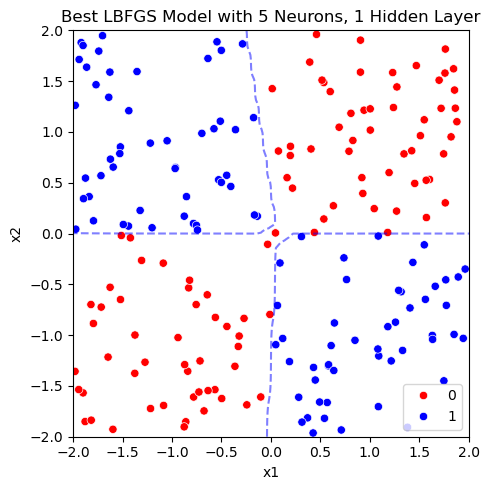

In [22]:
lbfgs_model((5,),"5 Neurons, 1 Hidden Layer", "5_n_1_l")

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization

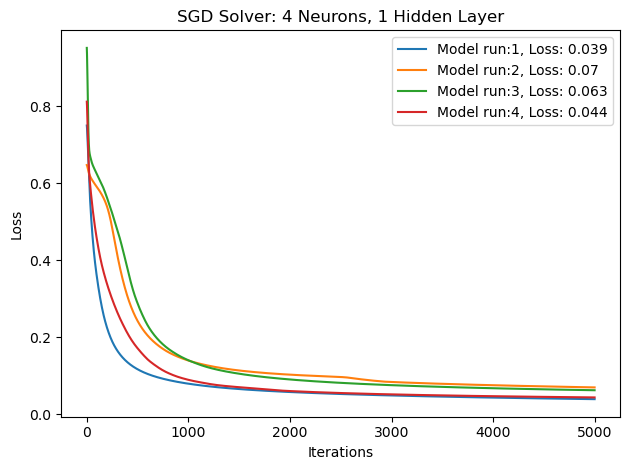

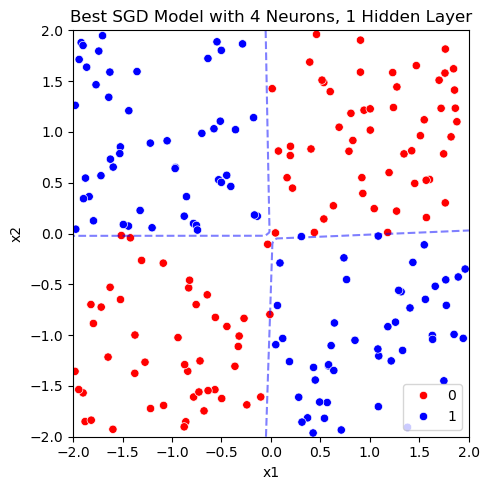

In [23]:
sgd_model((4,), "4 Neurons, 1 Hidden Layer", "4_n_1_l")

model pass 1 loss: 0.0
number of iterations until convergence: 148
model pass 2 loss: 0.079
number of iterations until convergence: 145
model pass 3 loss: 0.033
number of iterations until convergence: 200


/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


model pass 4 loss: 0.0
number of iterations until convergence: 200
model pass 5 loss: 0.001
number of iterations until convergence: 155


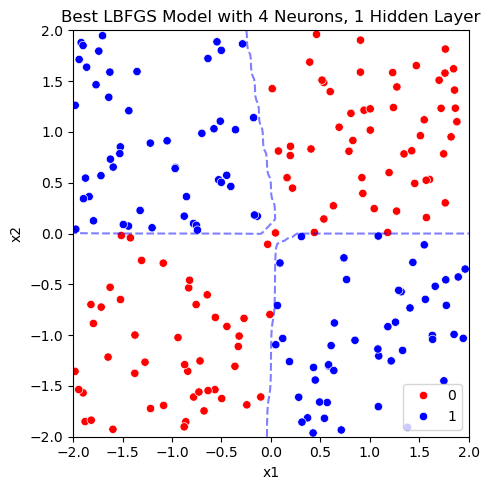

In [24]:
lbfgs_model((4,), "4 Neurons, 1 Hidden Layer", "4_n_1_l")

model pass 1 loss: 0.368
number of iterations until convergence: 26
model pass 2 loss: 0.339
number of iterations until convergence: 48
model pass 3 loss: 0.385
number of iterations until convergence: 43
model pass 4 loss: 0.001
number of iterations until convergence: 92


/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


model pass 5 loss: 0.001
number of iterations until convergence: 200


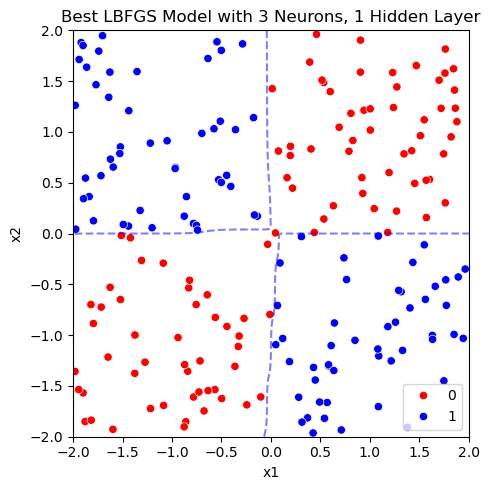

[array([[ 9.68400949, -0.53624525, 16.84255202],
       [18.95541403, 21.45436879, -1.2007222 ]]), array([[-19.70908523],
       [ 17.22327837],
       [ 11.36415347]])]


In [14]:
lbfgs_model((3,), "3 Neurons, 1 Hidden Layer", "3_n_1_l")

model pass 1 loss: 0.358
number of iterations until convergence: 41
model pass 2 loss: 0.409
number of iterations until convergence: 38
model pass 3 loss: 0.377
number of iterations until convergence: 42
model pass 4 loss: 0.342
number of iterations until convergence: 29
model pass 5 loss: 0.377
number of iterations until convergence: 46


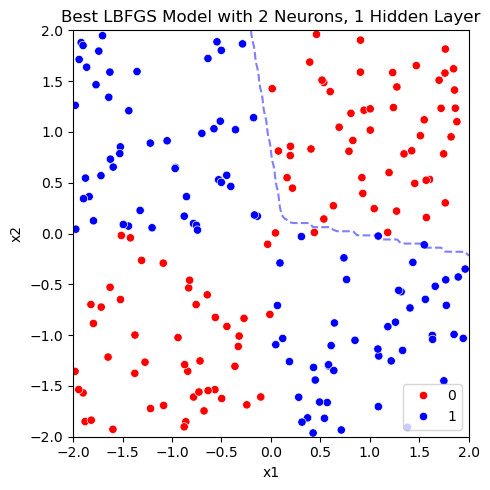

[array([[ 3.78342327, -2.13916181],
       [20.92728748, 20.12284053]]), array([[-14.70059938],
       [ 14.55617721]])]


In [15]:
lbfgs_model((2,), "2 Neurons, 1 Hidden Layer", "2_n_1_l")

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization

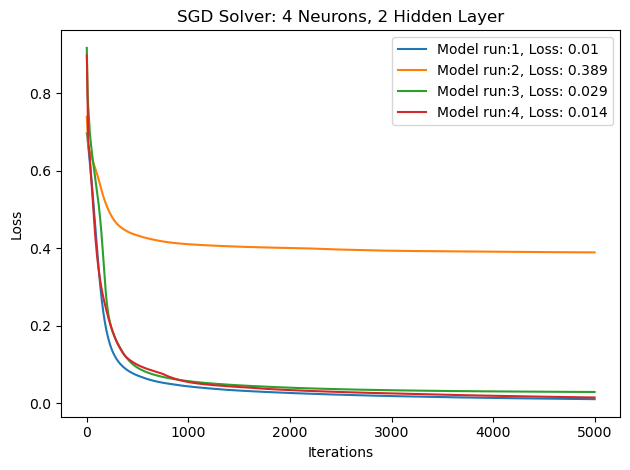

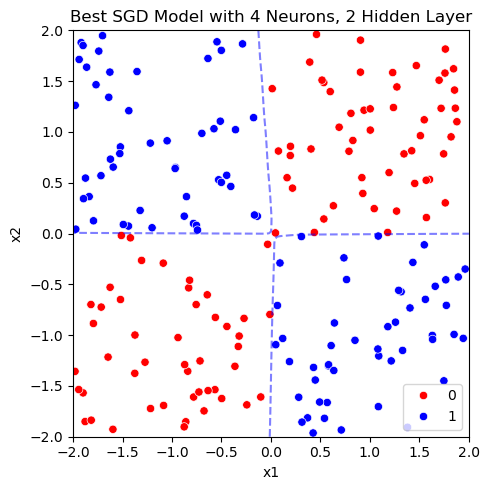

In [26]:
sgd_model((4,4), "4 Neurons, 2 Hidden Layer", "4_n_2_l")

In [27]:

for act in ['identity', 'logistic', 'tanh']:
    
    best_loss = float('inf')
    
    for i in range(4):
        clf = MLPClassifier(hidden_layer_sizes=(4,4), solver='sgd', activation = act, max_iter = 5000, tol=10**(-10), random_state=i+7 )
        clf.fit(X_train, y_train)
        temp_loss = clf.loss_
        if temp_loss < best_loss:
            best_loss = temp_loss
            
    print(f"Activation function: {act} with loss of {best_loss}")


Activation function: identity with loss of 0.6880068777444452


/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization

Activation function: logistic with loss of 0.692216336411724


/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


Activation function: tanh with loss of 0.136406872359106


/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


### Circles

Create the data set.

In [4]:
X_circle_5,y_circle_5=make_circles(n_samples=200, shuffle=True, random_state=None,factor=0.5)
X_circle_8,y_circle_8=make_circles(n_samples=200, shuffle=True, random_state=None,factor=0.8)
X_circle_9,y_circle_9=make_circles(n_samples=200, shuffle=True, random_state=None,factor=0.9)

### Design an MLP Classifier

In [15]:
def sgd_model_circles(neurons, struct, struct_save, x_data, y_data):
    best_sgd_model = None
    best_loss = float('inf')
    
    for i in range(4):
        clf_5 = MLPClassifier(hidden_layer_sizes=neurons, solver='sgd', max_iter = 5000, tol=10**(-10), random_state=i+7, learning_rate_init= 0.01)
        clf_5.fit(x_data, y_data)
        temp_loss = clf_5.loss_
        plt.plot(clf_5.loss_curve_, label = f"Model run:{i+1}, Loss: {round(temp_loss,3)}")
        if temp_loss < best_loss:
            best_loss = temp_loss
            best_sgd_model = clf_5
    
    plt.title(f"SGD Solver: {struct}")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"mlp_hidden_{struct_save}_loss_circles.jpg")
    plt.show()
    
    plot_classifier(best_sgd_model, x_data, y_data, f"SGD Model {struct}", f"sgd_circles_{struct_save}")

def lbfgs_model_circles(neurons, struct, struct_save, x_data, y_data):
    best_lbfgs_model = None
    best_loss_lbfgs = float('inf')
    
    for i in range(5):
        clf_lbfgs = MLPClassifier(hidden_layer_sizes=neurons, solver='lbfgs', tol=10**(-10), random_state=i+7)
        clf_lbfgs.fit(x_data,y_data)
        temp_loss = clf_lbfgs.loss_
        print(f"model pass {i+1} loss: {round(temp_loss,3)}")
        print(f"number of iterations until convergence: {clf_lbfgs.n_iter_}")
    
        if temp_loss < best_loss_lbfgs:
            best_loss_lbfgs = temp_loss
            best_lbfgs_model = clf_lbfgs
            
    plot_classifier(best_lbfgs_model, x_data, y_data, f"LBFGS Model {struct}", f"lbfgs_circles_{struct_save}")

def circles(neurons, struct, struct_save, x_data, y_data):
    sgd_model_circles(neurons, struct, struct_save, x_data, y_data)
    lbfgs_model_circles(neurons, struct, struct_save, x_data, y_data)

In [16]:
def all_circles(x_data, y_data, factor):
    circles((5,),f"5 Neurons, 1 Hidden Layer, Factor {factor}", f"5_n_1_l_f_{factor}", x_data, y_data)
    circles((4,), f"4 Neurons, 1 Hidden Layer, Factor {factor}", f"4_n_1_l_f_{factor}", x_data, y_data)
    circles((4,4), f"4 Neurons, 2 Hidden Layer, Factor {factor}", f"4_n_2_l_f_{factor}", x_data, y_data)

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization

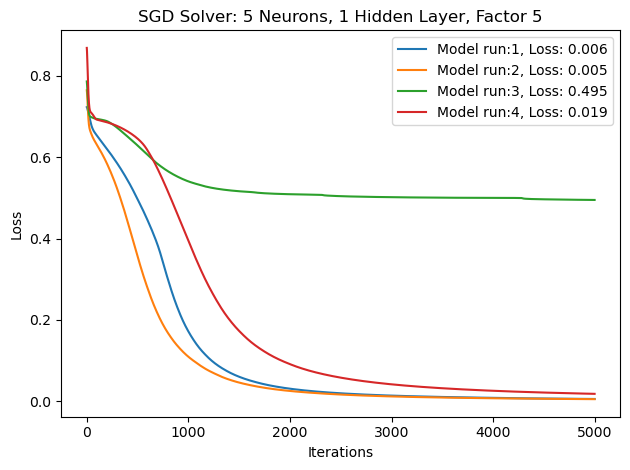

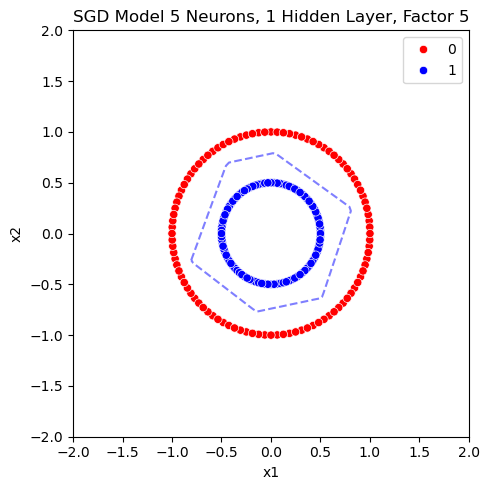

model pass 1 loss: 0.0
number of iterations until convergence: 127
model pass 2 loss: 0.0
number of iterations until convergence: 95


/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


model pass 3 loss: 0.0
number of iterations until convergence: 200
model pass 4 loss: 0.0
number of iterations until convergence: 200
model pass 5 loss: 0.0
number of iterations until convergence: 147


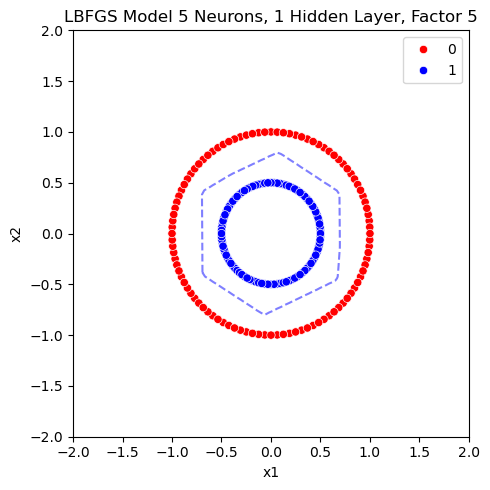

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization

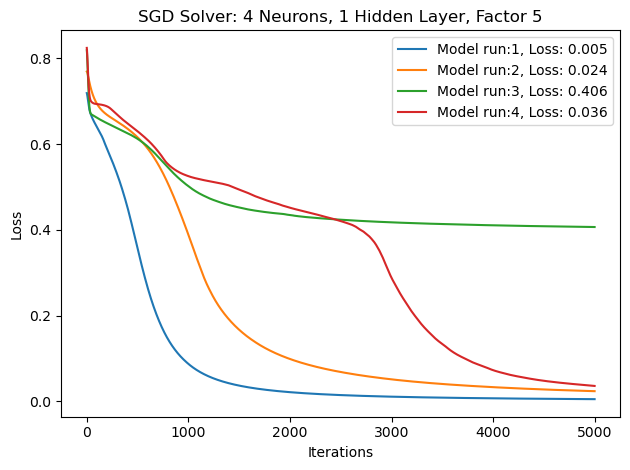

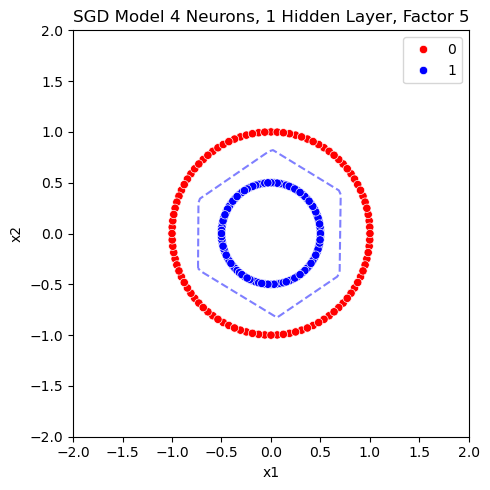

model pass 1 loss: 0.0
number of iterations until convergence: 152
model pass 2 loss: 0.297
number of iterations until convergence: 25
model pass 3 loss: 0.562
number of iterations until convergence: 26
model pass 4 loss: 0.0
number of iterations until convergence: 199
model pass 5 loss: 0.0
number of iterations until convergence: 157


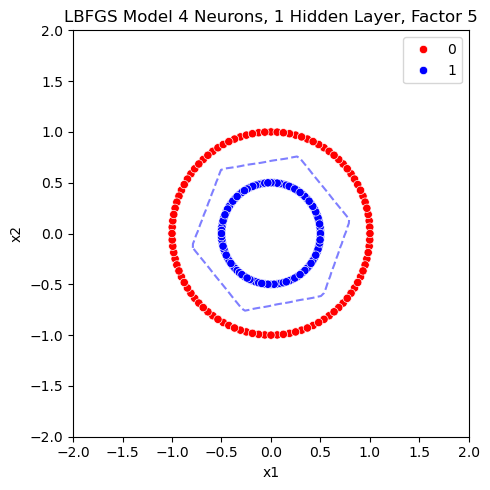

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization

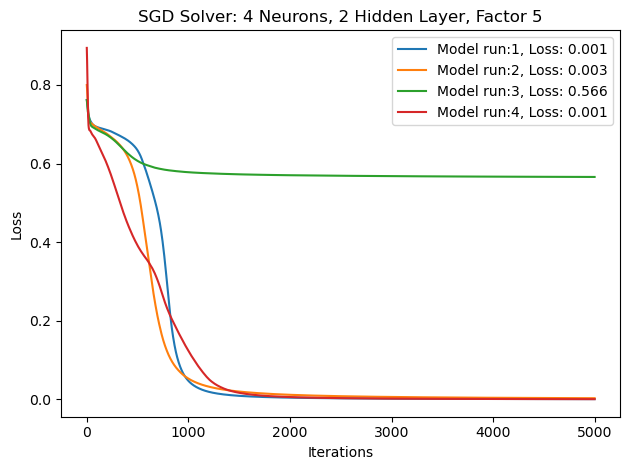

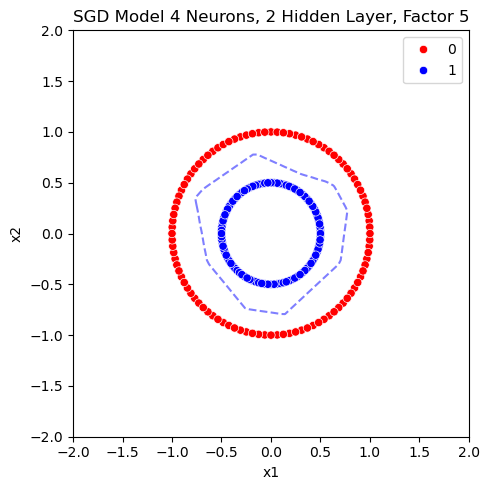

model pass 1 loss: 0.138
number of iterations until convergence: 33


/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


model pass 2 loss: 0.0
number of iterations until convergence: 200


/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


model pass 3 loss: 0.0
number of iterations until convergence: 200
model pass 4 loss: 0.0
number of iterations until convergence: 186
model pass 5 loss: 0.562
number of iterations until convergence: 28


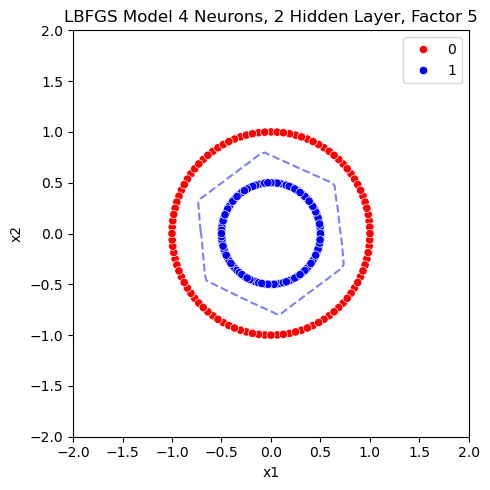

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization

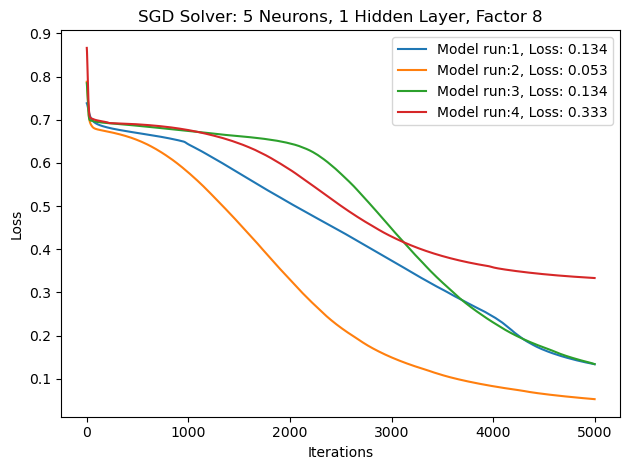

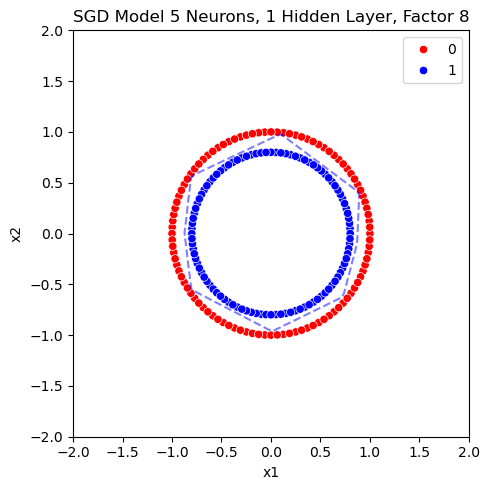

model pass 1 loss: 0.311
number of iterations until convergence: 69
model pass 2 loss: 0.0
number of iterations until convergence: 175
model pass 3 loss: 0.427
number of iterations until convergence: 83
model pass 4 loss: 0.421
number of iterations until convergence: 58
model pass 5 loss: 0.0
number of iterations until convergence: 200


/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


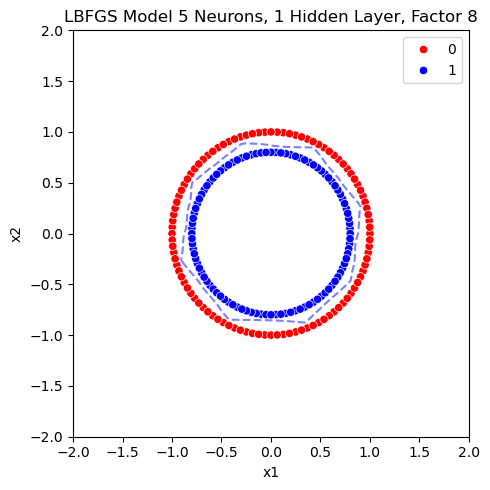

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization

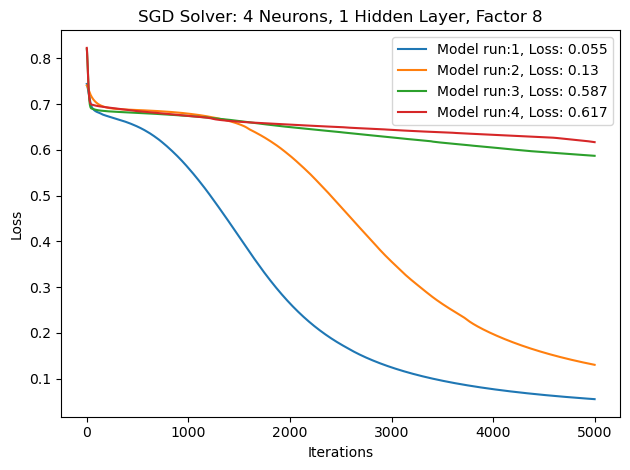

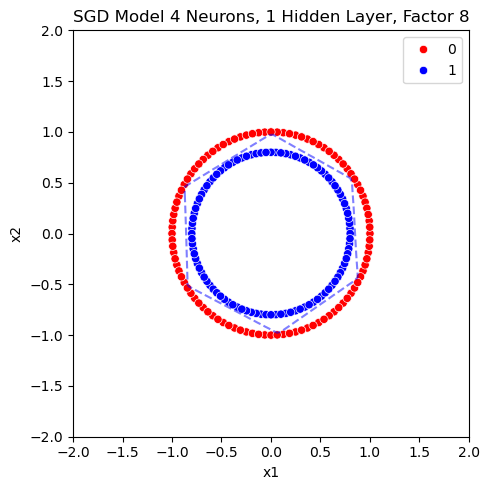

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


model pass 1 loss: 0.001
number of iterations until convergence: 200
model pass 2 loss: 0.409
number of iterations until convergence: 47
model pass 3 loss: 0.526
number of iterations until convergence: 36
model pass 4 loss: 0.511
number of iterations until convergence: 50
model pass 5 loss: 0.53
number of iterations until convergence: 79


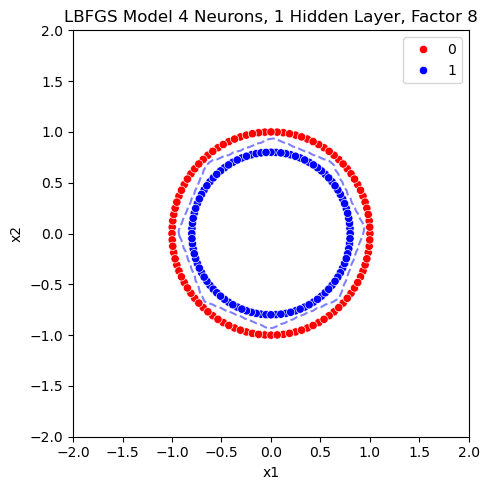

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


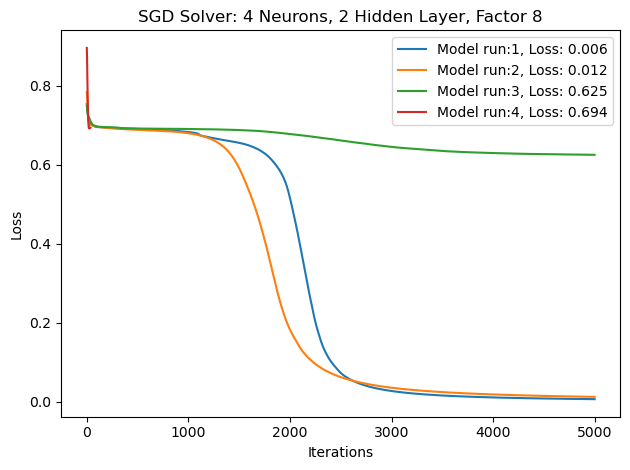

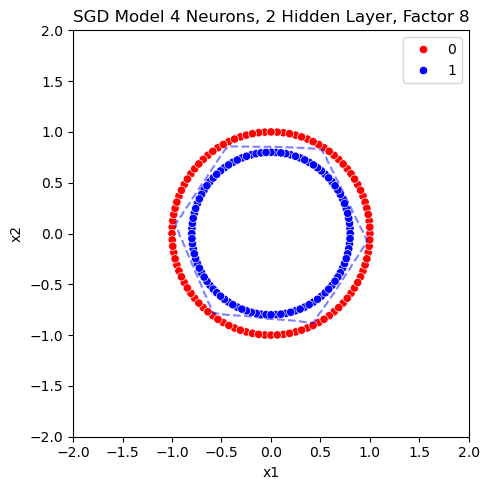

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


model pass 1 loss: 0.0
number of iterations until convergence: 200
model pass 2 loss: 0.204
number of iterations until convergence: 144
model pass 3 loss: 0.524
number of iterations until convergence: 122
model pass 4 loss: 0.139
number of iterations until convergence: 200


/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


model pass 5 loss: 0.599
number of iterations until convergence: 50


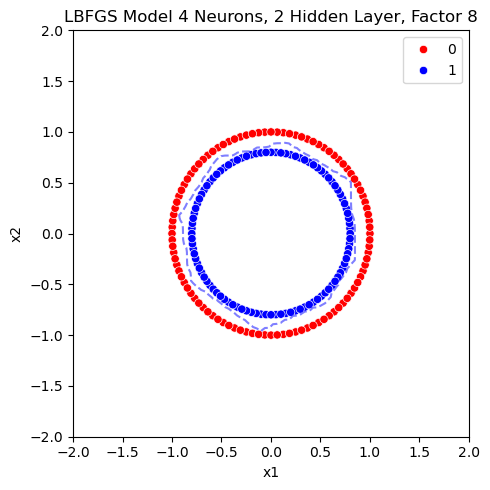

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization

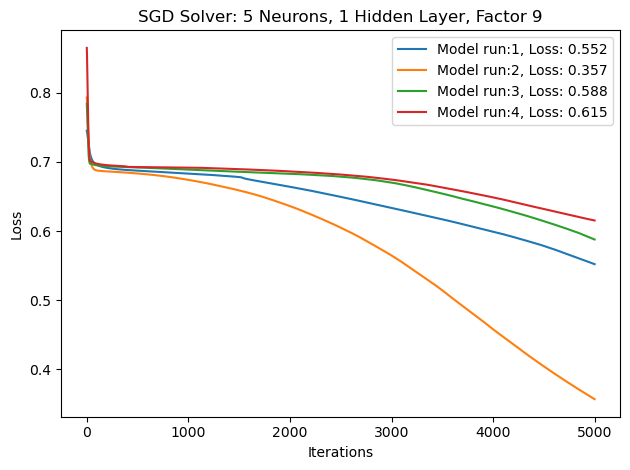

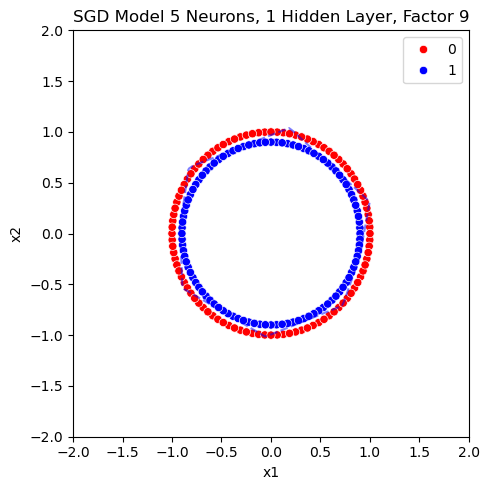

model pass 1 loss: 0.566
number of iterations until convergence: 59
model pass 2 loss: 0.24
number of iterations until convergence: 182
model pass 3 loss: 0.262
number of iterations until convergence: 96
model pass 4 loss: 0.27
number of iterations until convergence: 135
model pass 5 loss: 0.107
number of iterations until convergence: 200


/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


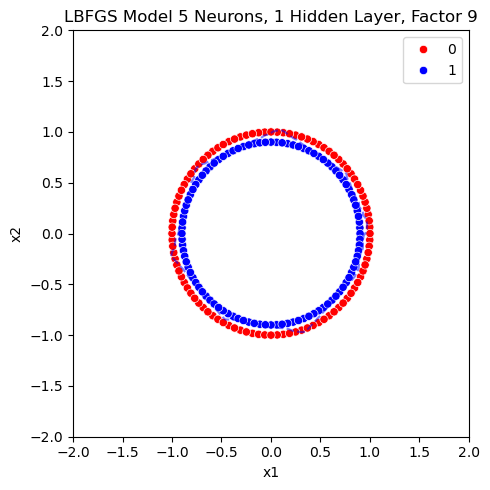

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization

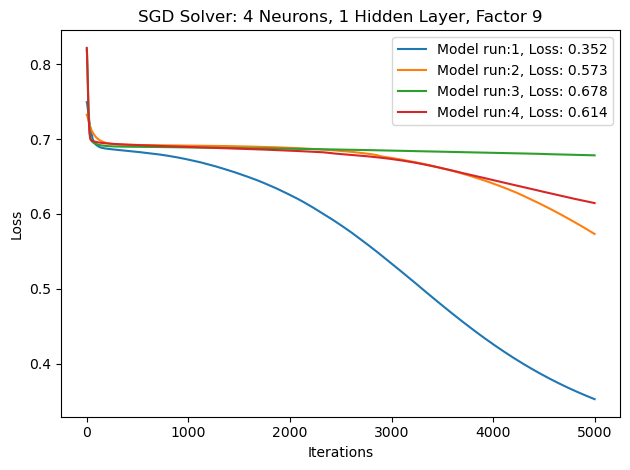

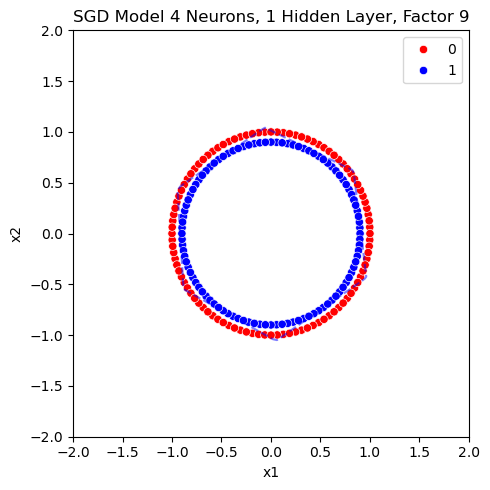

model pass 1 loss: 0.255
number of iterations until convergence: 115
model pass 2 loss: 0.516
number of iterations until convergence: 44
model pass 3 loss: 0.643
number of iterations until convergence: 17
model pass 4 loss: 0.568
number of iterations until convergence: 46
model pass 5 loss: 0.687
number of iterations until convergence: 22


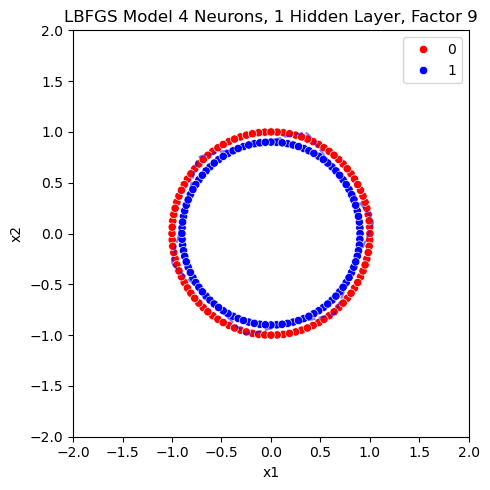

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


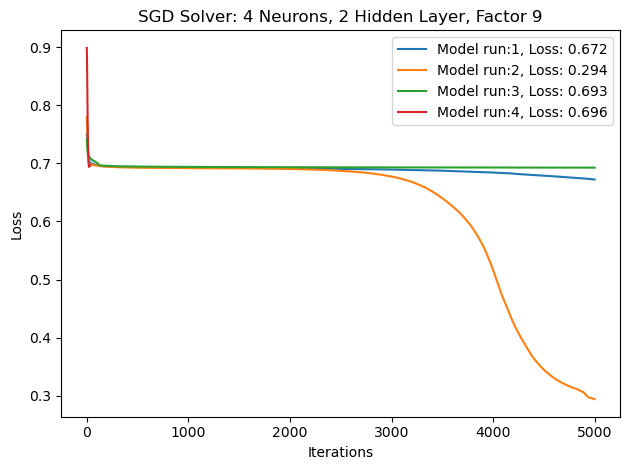

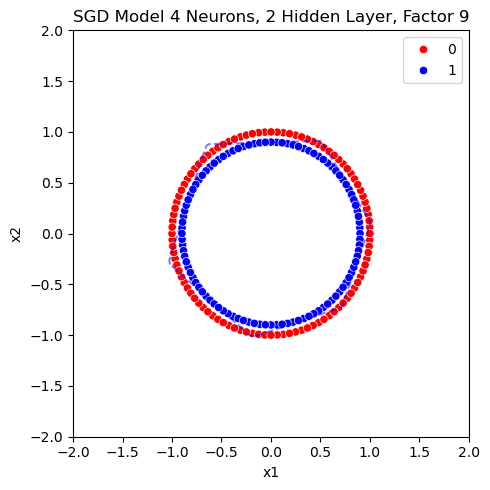

model pass 1 loss: 0.479
number of iterations until convergence: 186
model pass 2 loss: 0.274
number of iterations until convergence: 200


/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


model pass 3 loss: 0.617
number of iterations until convergence: 104
model pass 4 loss: 0.23
number of iterations until convergence: 200
model pass 5 loss: 0.628
number of iterations until convergence: 37


/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


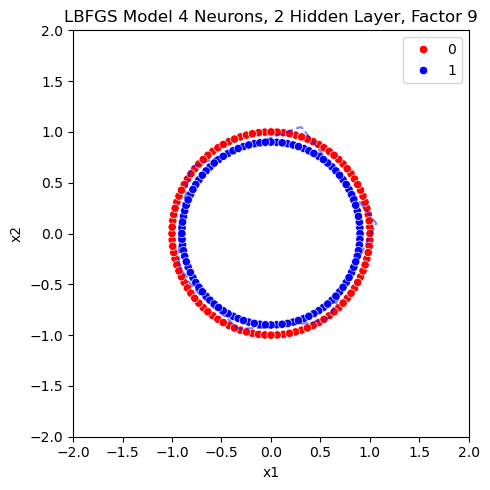

In [17]:
all_circles(X_circle_5, y_circle_5, 5)
all_circles(X_circle_8, y_circle_8, 8)
all_circles(X_circle_9, y_circle_9, 9)

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization

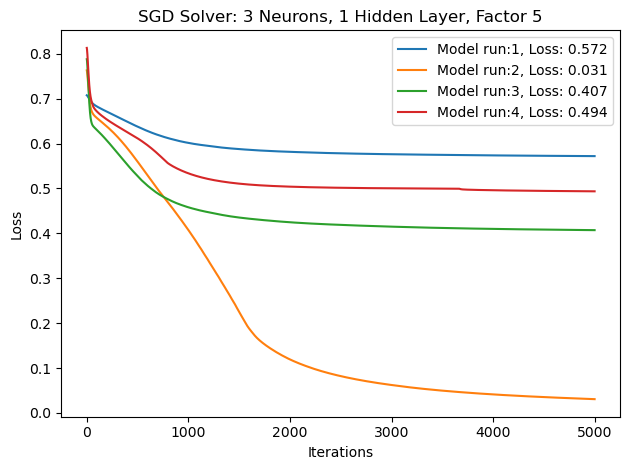

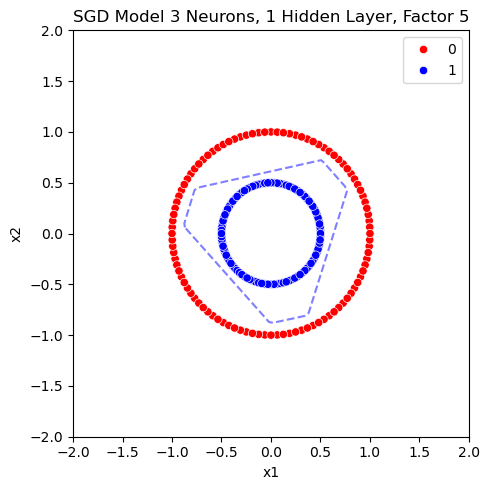

model pass 1 loss: 0.558
number of iterations until convergence: 34
model pass 2 loss: 0.168
number of iterations until convergence: 25
model pass 3 loss: 0.366
number of iterations until convergence: 27
model pass 4 loss: 0.466
number of iterations until convergence: 62


/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


model pass 5 loss: 0.444
number of iterations until convergence: 36


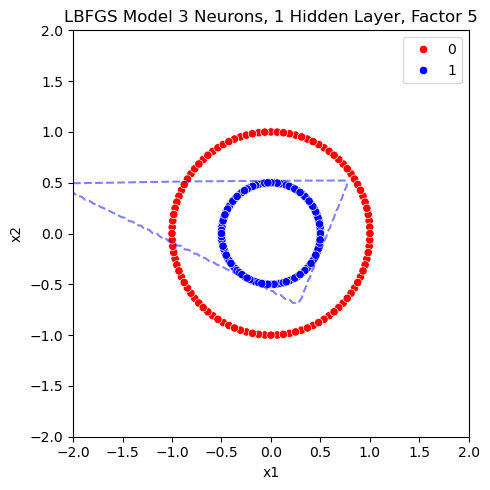

In [18]:
circles((3,), f"3 Neurons, 1 Hidden Layer, Factor 5", f"3_n_1_l_f_5", X_circle_5, y_circle_5)

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization

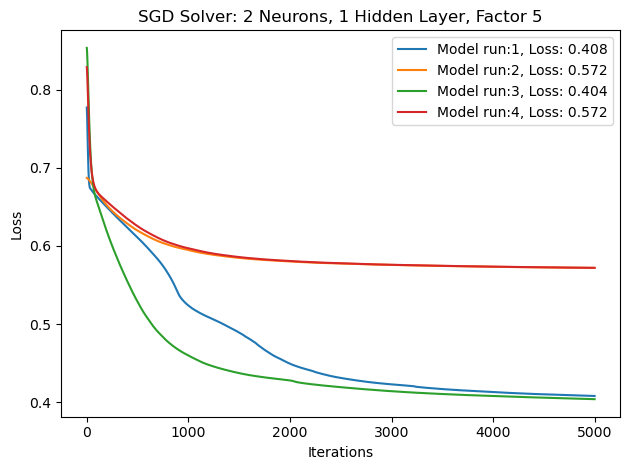

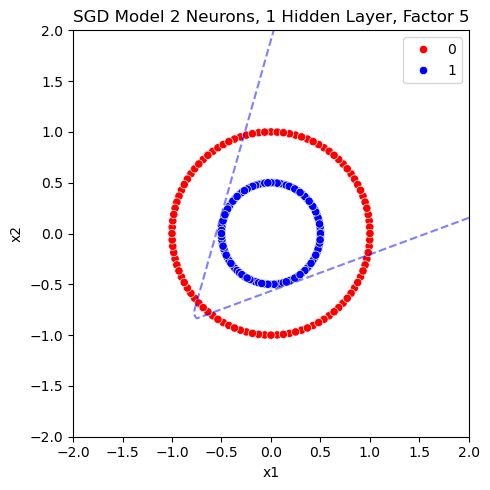

model pass 1 loss: 0.368
number of iterations until convergence: 83
model pass 2 loss: 0.563
number of iterations until convergence: 27
model pass 3 loss: 0.366
number of iterations until convergence: 42
model pass 4 loss: 0.558
number of iterations until convergence: 30
model pass 5 loss: 0.374
number of iterations until convergence: 32


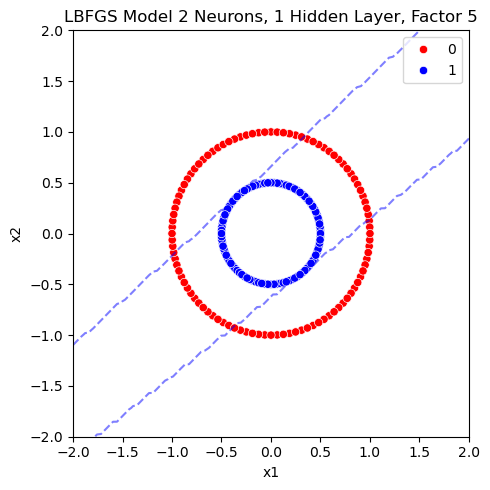

In [19]:
circles((2,), f"2 Neurons, 1 Hidden Layer, Factor 5", f"2_n_1_l_f_5", X_circle_5, y_circle_5)

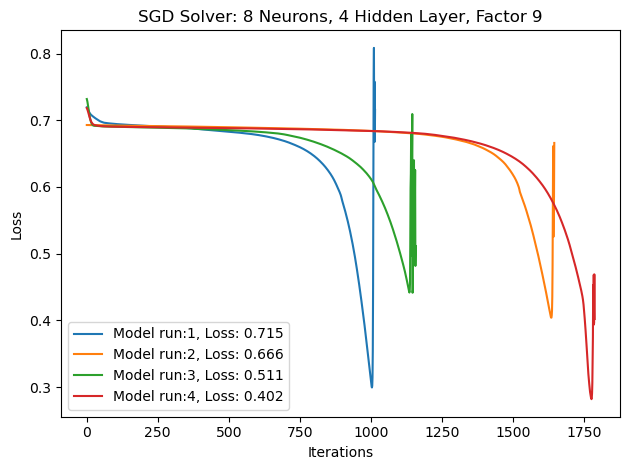

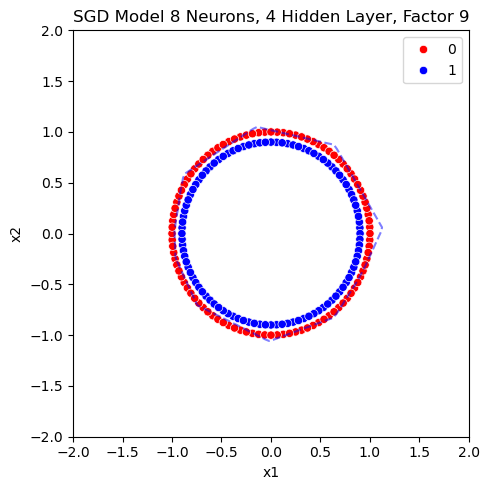

/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


model pass 1 loss: 0.065
number of iterations until convergence: 200
model pass 2 loss: 0.477
number of iterations until convergence: 178


/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


model pass 3 loss: 0.074
number of iterations until convergence: 200


/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


model pass 4 loss: 0.0
number of iterations until convergence: 200


/Users/acard36/opt/anaconda3/envs/help_me/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


model pass 5 loss: 0.0
number of iterations until convergence: 200


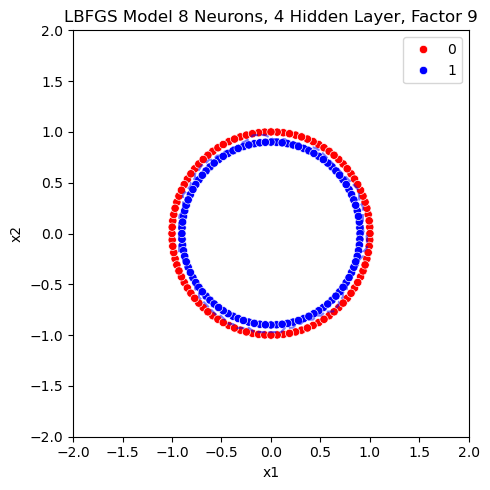

In [20]:
circles((8,8,8,8), f"8 Neurons, 4 Hidden Layer, Factor 9", f"8_n_4_l_f_9", X_circle_9, y_circle_9)

### Experiments at p.4
Describe the above. It looks like 4 neurons with the lbfgs solver can perfectly classify.

## Regression

Create chirp signal and make a plot of the data.

In [ ]:
X = np.arange(0,2.5,.02).reshape(-1,1)
X_train = np.random.uniform(-1,1,50).reshape(-1,1)
y = np.sin(np.pi*X**2).ravel()
plt.plot(X,y,'bo')
plt.plot(X,y)